#### Third Assignment -Big Data Mining

##### Theodora Koutsothanasi

#### Define the problem

#### Questions we need to answer:

- Provide an overview of the dataset size, features, and distribution of feature values.
- Describe the average delays per airport/airline.
- Identify and report the most prominent rules of association between delays and point of origin AND/OR point of arrival.
- Try to predict the delay given all other features and report the appropriate performance on cross-validation.
- Identify patterns/rules regarding delays and try to explain when delays should be expected, based on these patterns

In [20]:
#Import important libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [21]:
#Load the dataset
from scipy.io import arff
import pandas as pd

data = arff.loadarff(r'D:\Desktop\MscDataScience\Big Data Mining\Dataset3 - Final.arff')
df = pd.DataFrame(data[0])

df.head()

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
0,5.0,600.0,b'UA',b'899.0',b'ORD',b'IAD',-3.0
1,5.0,615.0,b'DL',b'357.0',b'IAD',b'ATL',5.0
2,5.0,615.0,b'UA',b'341.0',b'IAD',b'DEN',8.0
3,5.0,625.0,b'CO',b'581.0',b'IAD',b'DEN',44.0
4,5.0,630.0,b'UA',b'902.0',b'CLE',b'IAD',-10.0


#### Data Wrangling

In [22]:
# Remove b in from of unique carrier,FlightNum and Dest names

df['UniqueCarrier'] = df['UniqueCarrier'].str.decode('utf-8')
df['FlightNum'] = df['FlightNum'].str.decode('utf-8')
df['Dest'] = df['Dest'].str.decode('utf-8')
df['Origin'] = df['Origin'].str.decode('utf-8')

In [23]:
df.head(10)

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
0,5.0,600.0,UA,899.0,ORD,IAD,-3.0
1,5.0,615.0,DL,357.0,IAD,ATL,5.0
2,5.0,615.0,UA,341.0,IAD,DEN,8.0
3,5.0,625.0,CO,581.0,IAD,DEN,44.0
4,5.0,630.0,UA,902.0,CLE,IAD,-10.0
5,5.0,635.0,EA,931.0,CLE,IAD,-13.0
6,5.0,635.0,UA,563.0,EWR,IAD,-12.0
7,5.0,636.0,UA,951.0,IAD,RIC,1.0
8,5.0,645.0,UA,1095.0,DTW,IAD,-7.0
9,5.0,645.0,UA,1021.0,BOS,IAD,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100161 entries, 0 to 100160
Data columns (total 7 columns):
DayofWeek        100161 non-null float64
CRSDepTime       100161 non-null float64
UniqueCarrier    100161 non-null object
FlightNum        100161 non-null object
Origin           100161 non-null object
Dest             100161 non-null object
ArrDelay         100161 non-null float64
dtypes: float64(3), object(4)
memory usage: 5.3+ MB


#### Exploratory Analysis
##### Overview of the dataset size, features, and distribution of feature values.

In [25]:
df.describe()

,DayofWeek,CRSDepTime,ArrDelay
count,100161.000000,100161.000000,100161.000000
mean,3.952626,1357.918262,4.638462
std,1.985074,460.022924,23.397863
min,1.000000,5.000000,-72.000000
25%,2.000000,925.000000,-7.000000
50%,4.000000,1335.000000,0.000000
75%,6.000000,1735.000000,9.000000
max,7.000000,2359.000000,667.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE666C1BE0>,
      dtype=object)

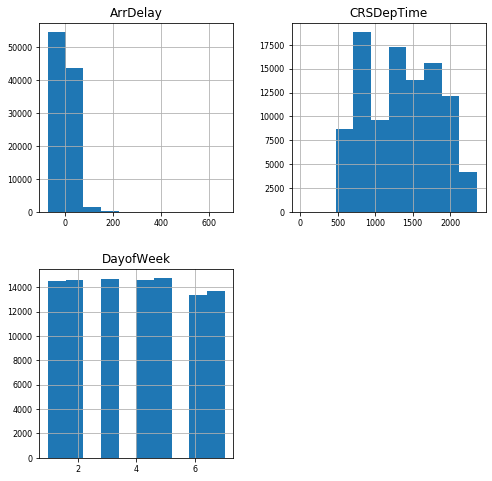

In [26]:
#Plot the histograms
df.hist(figsize=(8,8),ylabelsize=8,xlabelsize=8)

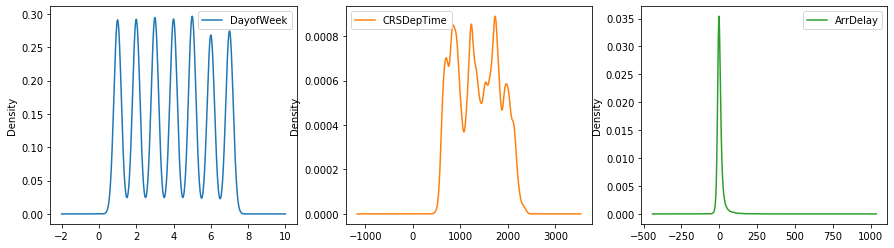

In [27]:
# Univariate Density Plots
from matplotlib import pyplot
df.plot(kind='density', layout=(1,3),figsize=(15,4),subplots=True, sharex=False)
pyplot.show()

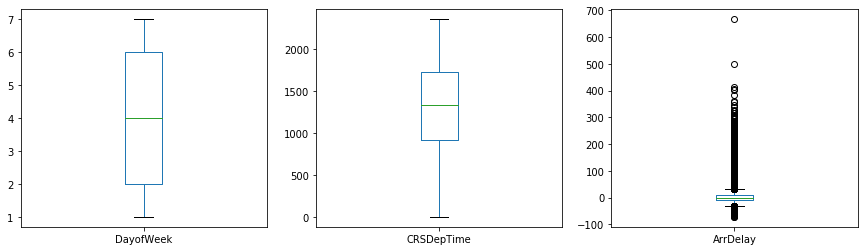

In [28]:
# Box Plots
df.plot(kind='box', layout=(1,3),figsize=(15,4),subplots=True, sharex=False)
pyplot.show()

In [29]:
# Number of delays above 250
arr=df['ArrDelay']>250
arr.sum()

56

In [30]:
#Number of delays below 0
arr2=df['ArrDelay']<0
arr2.sum()

47453

In [78]:
#Number of flights per Carrier
carrier_count = df['UniqueCarrier'].value_counts()
print(carrier_count)

UA          63706
CO           9219
AA           8620
NW           5521
DL           4793
US           3513
TW           3056
EA           1420
'PA (1)'      313
Name: UniqueCarrier, dtype: int64


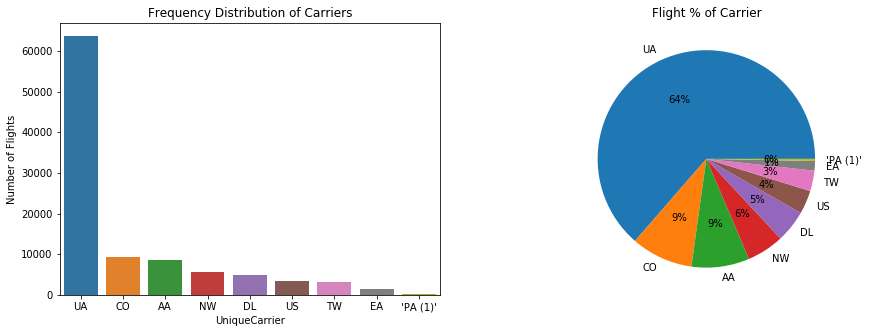

In [32]:
#Graphical representation of carriers scheduled flights in numbers and %
import seaborn as sns
f,ax=plt.subplots(1,2,figsize=(15,5))
carrier_count.plot.pie(autopct='%1.0f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Flight % of Carrier')
ax[1].set_ylabel('')
sns.countplot('UniqueCarrier',order = carrier_count.index, data=df,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_ylabel('Number of Flights')
plt.show()

UA carrier possess the 64% of flights of this dataset.

In [33]:
#Number of flights per weekday
No_flights_weekday=df['DayofWeek'].value_counts()

print(No_flights_weekday)

5.0    14780
3.0    14686
4.0    14576
2.0    14554
1.0    14509
7.0    13684
6.0    13372
Name: DayofWeek, dtype: int64


In [34]:
no_origins=df['Origin'].value_counts()
print(no_origins)

IAD    50229
DEN     2911
ATL     2820
ORD     2753
LAX     2591
LGA     2364
BOS     2210
DTW     2176
DFW     2145
EWR     1943
BDL     1795
PIT     1701
MCO     1681
CLE     1458
SFO     1397
TPA     1184
ROC     1177
IAH     1124
MSY      912
MEM      903
STL      902
FLL      859
BUF      835
PHL      783
JAX      740
MIA      735
RDU      722
PBI      688
SLC      686
MSP      644
CHS      534
ORF      531
MHT      447
CAE      446
IND      439
SYR      364
PHF      355
GSO      329
BTV      326
SDF      324
RSW      322
PWM      303
SEA      299
PVD      296
BNA      294
SJU      277
HPN      228
HOU      201
SAV      201
ISP      146
JFK      142
PHX       91
SRQ       85
MDW       62
BWI       43
RIC        4
DCA        3
MDT        1
Name: Origin, dtype: int64


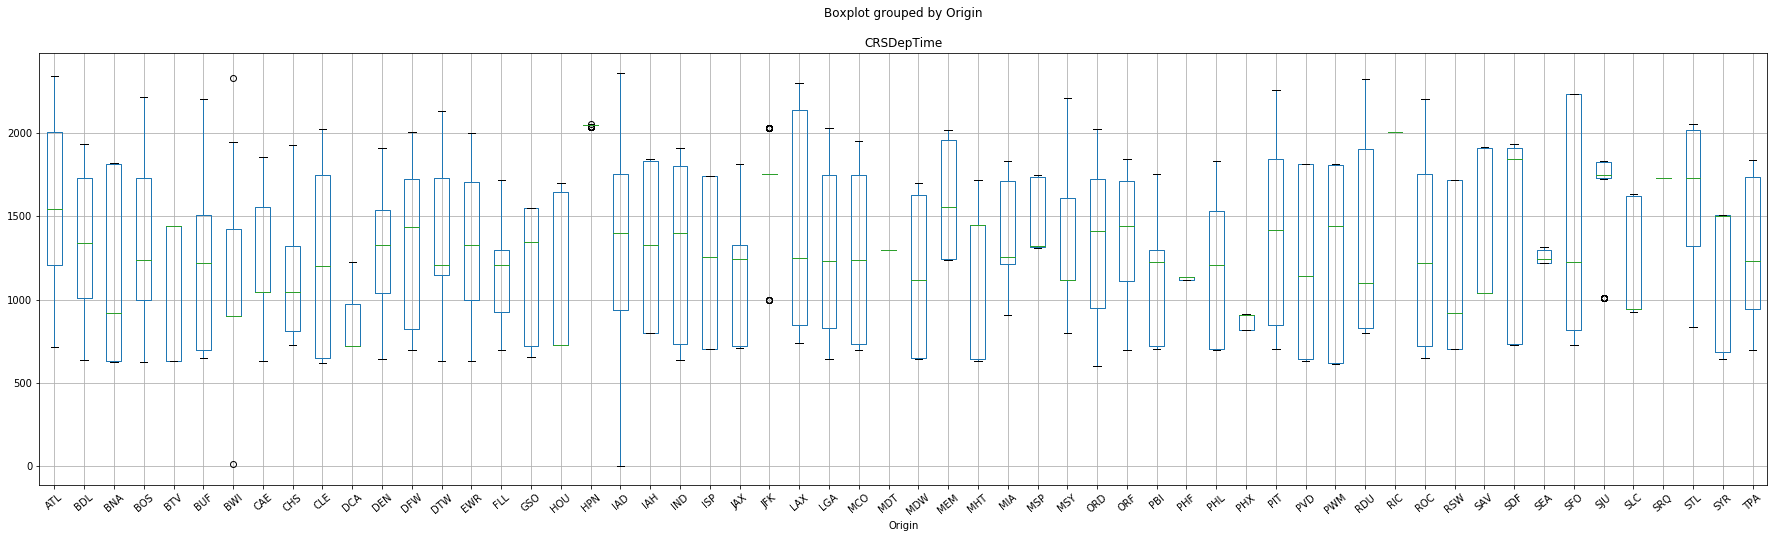

In [37]:
# Pattern of departure time from the airports 

df.boxplot('CRSDepTime','Origin', rot = 40, figsize=(30,8))

plt.show()


#### Describe the average delays per airport/airline

UniqueCarrier
'PA (1)'    16.223642
AA           1.908237
CO           4.919948
DL           5.118715
EA          11.728169
NW           5.004890
TW           5.179647
UA           4.569664
US           6.246798
Name: ArrDelay, dtype: float64


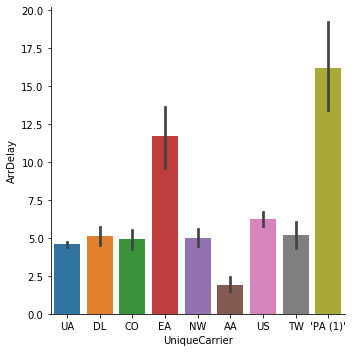

In [35]:
# Calculate the average delay per airline-carrier.
carrier_group = df['ArrDelay'].groupby(df['UniqueCarrier']).mean()
print(carrier_group)


sns.catplot(x="UniqueCarrier", y="ArrDelay",
            kind="bar", data=df);

In [36]:
# Calculate the average delay per airport-destination.
airport_group = df['ArrDelay'].groupby(df['Dest']).mean().sort_values(ascending=False)
print(airport_group)

Dest
MDT    21.000000
FLL    14.638554
MDW    11.873016
CHS    11.830153
PBI    11.072857
JFK     9.690909
MCO     9.545346
HOU     8.954545
BOS     8.570847
EWR     8.528418
MSP     8.340841
CLE     8.035286
RDU     7.352941
MIA     7.196009
BDL     7.168256
PHL     6.934949
SFO     6.711826
PIT     6.639838
TPA     6.525869
ORD     5.786903
MSY     5.692731
SAV     5.617978
RSW     5.433846
LGA     5.377581
DEN     5.261564
SJU     4.901361
DTW     4.829739
MEM     4.674145
SDF     4.451713
SLC     4.170000
IAD     4.083373
IAH     4.073019
ROC     3.553556
SEA     3.325658
ATL     3.265894
DCA     3.000000
ORF     2.712946
BUF     2.539024
HPN     2.328829
PHX     2.186667
DFW     2.097717
RIC     2.000000
JAX     1.990437
PVD     1.922559
SYR     1.849315
PHF     1.416431
STL     1.312961
PWM     1.114379
IND     1.016092
LAX     0.719517
CAE     0.692308
MHT     0.347534
BTV     0.217666
BNA    -0.195440
ISP    -2.119718
SRQ    -2.785714
BWI    -6.000000
GSO    -6.012158
CRW    -6

#### Identify and report the most prominent rules of association between delays and point of origin AND/OR point of arrival.

In [79]:
#Reshape the dataset, in order to apply the Apriori algorithm

In [87]:
origin_delay=df[['Origin','ArrDelay']]

In [80]:
origin_group = df['Origin'].groupby(df['ArrDelay']).value_counts()

In [90]:
#Applying One hot Enconding
df_onehotenc=pd.get_dummies(origin_delay,prefix=['Delay'],columns=['ArrDelay'])

In [98]:
items = (df['Origin'].unique())
items

array(['ORD', 'IAD', 'CLE', 'EWR', 'DTW', 'BOS', 'LGA', 'CAE', 'BDL',
       'ISP', 'TPA', 'FLL', 'RSW', 'BUF', 'ROC', 'MCO', 'JAX', 'PBI',
       'GSO', 'IAH', 'DEN', 'CHS', 'SFO', 'DFW', 'LAX', 'RDU', 'PIT',
       'SLC', 'JFK', 'ATL', 'PHF', 'MSY', 'MDW', 'MIA', 'MEM', 'STL',
       'ORF', 'SJU', 'RIC', 'DCA', 'SEA', 'MSP', 'PHL', 'MDT', 'HPN',
       'BWI', 'SRQ', 'MHT', 'SYR', 'SDF', 'BTV', 'IND', 'BNA', 'HOU',
       'SAV', 'PVD', 'PWM', 'PHX'], dtype=object)

In [94]:
num_records=len(df_onehotenc)

In [96]:
from apyori import apriori
import matplotlib.pyplot as plt

In [99]:
records=[]
for i in range(0,num_records):
     records.append([str(df_onehotenc.values[i,j] for j in range(0,2))])

In [100]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [101]:
print(len(association_results))

0


#### Predict the delay given all other features and report the appropriate performance on cross-validation.

In [50]:
#Transform arrdelay to 0 if it is not delayed and 1 if it is.

df['ArrDelay']=df['ArrDelay'].apply(lambda x: 0 if x <= 0 else 1)

In [51]:
df.head(5)

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
0,5.0,600.0,UA,899.0,ORD,IAD,0
1,5.0,615.0,DL,357.0,IAD,ATL,1
2,5.0,615.0,UA,341.0,IAD,DEN,1
3,5.0,625.0,CO,581.0,IAD,DEN,1
4,5.0,630.0,UA,902.0,CLE,IAD,0


In [57]:
#Transform categorical data into numeric-Label Encoder
from sklearn.preprocessing import LabelEncoder
df['Carrier_label_enc']=LabelEncoder().fit_transform(df.UniqueCarrier)
df['Origin_label_enc']=LabelEncoder().fit_transform(df.Origin)
df['Dest_label_enc']=LabelEncoder().fit_transform(df.Dest)

In [56]:
df.head(5)

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay,Carrier_label_enc,Origin_label_enc,Dest_label_enc
0,5.0,600.0,UA,899.0,ORD,IAD,0,7,35,20
1,5.0,615.0,DL,357.0,IAD,ATL,1,3,19,0
2,5.0,615.0,UA,341.0,IAD,DEN,1,7,19,12
3,5.0,625.0,CO,581.0,IAD,DEN,1,2,19,12
4,5.0,630.0,UA,902.0,CLE,IAD,0,7,9,20


In [67]:
Log_df= df[['DayofWeek','CRSDepTime','Carrier_label_enc','Origin_label_enc','Dest_label_enc','ArrDelay']]

In [69]:
Log_df.head(2)

,DayofWeek,CRSDepTime,Carrier_label_enc,Origin_label_enc,Dest_label_enc,ArrDelay
0,5.0,600.0,7,35,20,0
1,5.0,615.0,3,19,0,1


In [76]:
# Logistic Regression Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = Log_df.values
X = array[:,0:5]
Y = array[:,5]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.5342997794324726


In [77]:
# Random Forest
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

array = Log_df.values
X = array[:,0:5]
Y = array[:,5]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6110963887349972


#### Identify patterns/rules regarding delays and try to explain when delays should be expected, based on these patterns